<a href="https://colab.research.google.com/github/khema15/Finding_Creditworthy_Borrowers/blob/main/Finding_Creditworthy_Borrowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA COLLECTION

In [ ]:
import pandas as pd
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(df)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [ ]:
print(df.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


# DATA PREPROCESSING

In [ ]:
#preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data_cleaned = data.drop(columns=['ID'])
X = data_cleaned.drop(columns=['Personal Loan'])
y = data_cleaned['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:34:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 98.80%


## FEATURE SELECTION

In [ ]:
#chi-square test

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
X_filled = X.fillna(0)
negative_features = X_filled.columns[X_filled.lt(0).any()]
print(f"Features with negative values: {negative_features.tolist()}")
if len(negative_features) > 0:
    scaler = MinMaxScaler()
    X_filled[negative_features] = scaler.fit_transform(X_filled[negative_features].astype(float))
else:
    print("No negative features found, skipping scaling.")
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X_filled, y)
chi_scores = pd.DataFrame({
    'Feature': X_filled.columns,
    'Chi2 Score': chi_selector.scores_,
    'P-Value': chi_selector.pvalues_
})
chi_scores = chi_scores.sort_values(by='Chi2 Score', ascending=False)
num_best_features = 8
best_features_df = chi_scores.head(num_best_features)
print("Best Features and Chi-squared Values:")
for index, row in best_features_df.iterrows():
    print(f"  - {row['Feature']}: {row['Chi2 Score']:.2f}")
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Features with negative values: ['Experience']
Best Features and Chi-squared Values:
  - Income: 36252.49
  - Mortgage: 18482.59
  - CCAvg: 1060.54
  - CD Account: 470.18
  - Education: 35.04
  - Family: 10.35
  - Securities Account: 2.16
  - Age: 0.86
Accuracy: 98.80%


In [ ]:
#information gain
from sklearn.preprocessing import MinMaxScaler
X_filled = X.fillna(0)
negative_features = X_filled.columns[X_filled.lt(0).any()]
print(f"Features with negative values: {negative_features.tolist()}")
if len(negative_features) > 0:
    scaler = MinMaxScaler()
    X_filled[negative_features] = scaler.fit_transform(X_filled[negative_features].astype(float))
else:
    print("No negative features found, skipping scaling.")
chi_selector = SelectKBest(chi2, k='all')
chi_selector.fit(X_filled, y)
chi_scores = pd.DataFrame({
    'Feature': X_filled.columns,
    'Chi2 Score': chi_selector.scores_,
    'P-Value': chi_selector.pvalues_
})
chi_scores = chi_scores.sort_values(by='Chi2 Score', ascending=False)
best_feature = chi_scores.iloc[0]['Feature']
print(f"\nBest Feature (based on Chi-squared test): {best_feature}")
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Features with negative values: ['Experience']

Best Feature (based on Chi-squared test): Income
Accuracy: 99.00%


In [ ]:
#lasso regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.06658975356466465
R-squared: 0.29140991152258955


In [ ]:
#linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_linear}")
print(f"Linear Regression - R-squared (R²): {r2_linear}")

#linear is the best model because mse value is less than the lasso and r-squared is closer to 1 so this the best model

Linear Regression - Mean Squared Error (MSE): 0.05447410684301377
Linear Regression - R-squared (R²): 0.42033405860054507


## MODEL ACCURACY/CLASSIFICATION

In [ ]:
#xgboost model

from xgboost import XGBClassifier



xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.00%


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#ANN


from sklearn.neural_network import MLPClassifier


ann_model.fit(X_train, y_train)
ann_pred = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_pred)
print(f'ANN Accuracy: {ann_accuracy * 100:.2f}%')


ANN Accuracy: 96.67%


In [ ]:
#Random forest


from sklearn.ensemble import RandomForestClassifier

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

Random Forest Accuracy: 98.93%


In [ ]:
#logic regression


from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=4000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 94.93%


In [ ]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')


Decision Tree Accuracy: 98.00%


## CONFUSION MATRIX

Confusion Matrix:
[[892   3]
 [  6  99]]

Accuracy: 99.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.97      0.94      0.96       105

    accuracy                           0.99      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



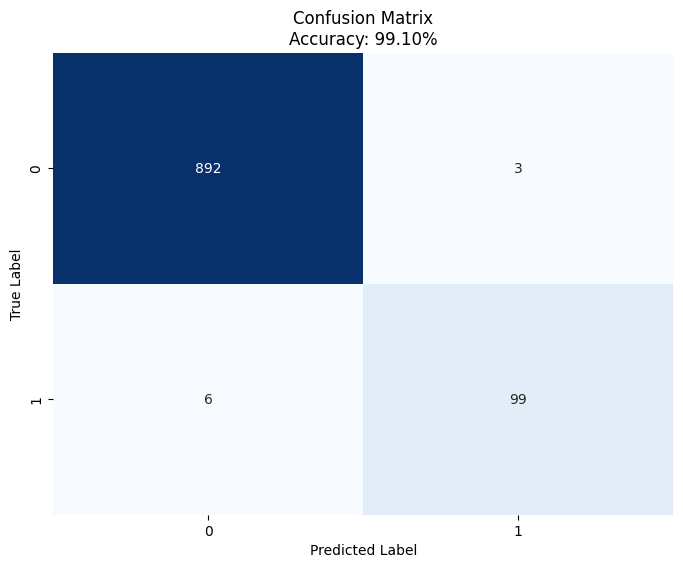

In [ ]:
# confusion matrix for xgboost model


import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(f"Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Confusion Matrix:
[[890   5]
 [ 22  83]]

Accuracy: 97.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       895
           1       0.94      0.79      0.86       105

    accuracy                           0.97      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.97      0.97      0.97      1000



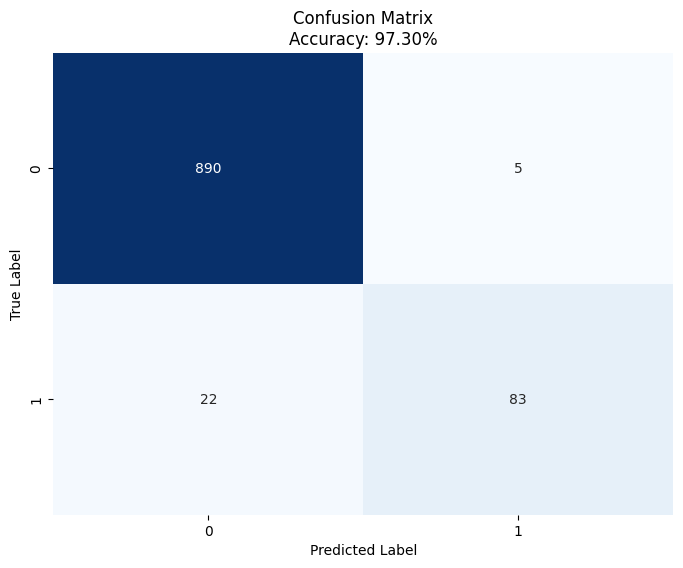

In [ ]:
# confusion matrix for ANN model

import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(f"Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
[[894   1]
 [  8  97]]

Accuracy: 99.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.92      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000



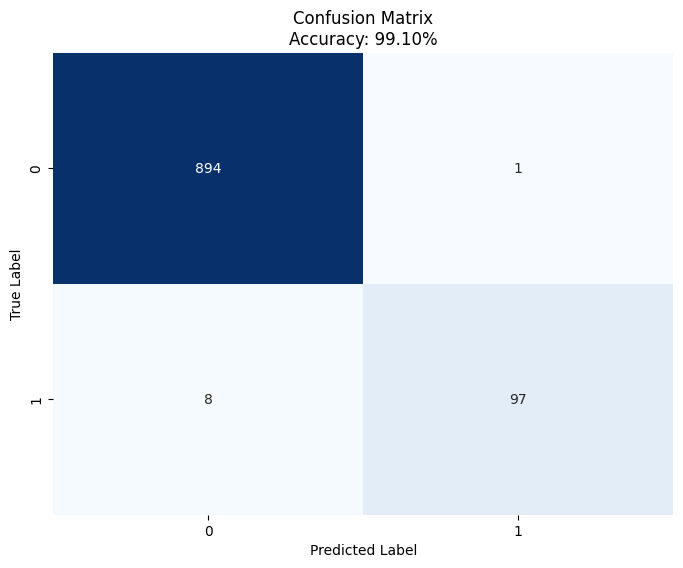

In [ ]:
# confusion matrix for the Random forest model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(f"Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
[[894   1]
 [  8  97]]

Accuracy: 95.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.85      0.67      0.75       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000



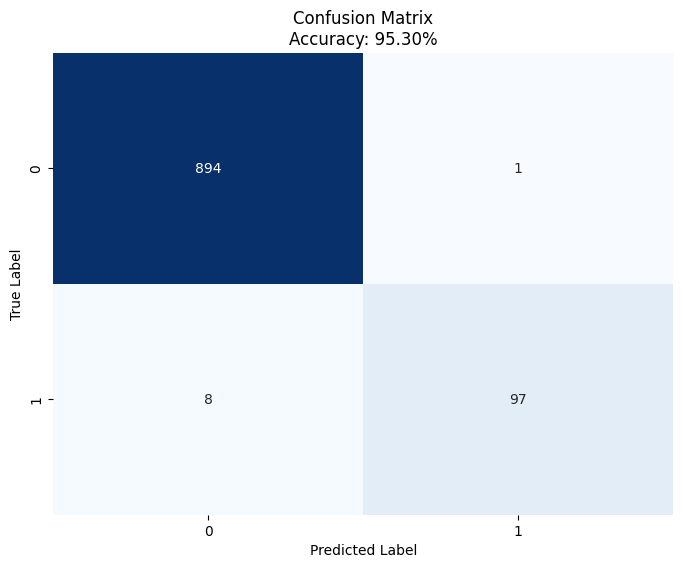

In [ ]:
#confusion matrix for the logic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=4000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(f"Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix:
[[894   1]
 [  8  97]]

Accuracy: 95.30%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.85      0.67      0.75       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000



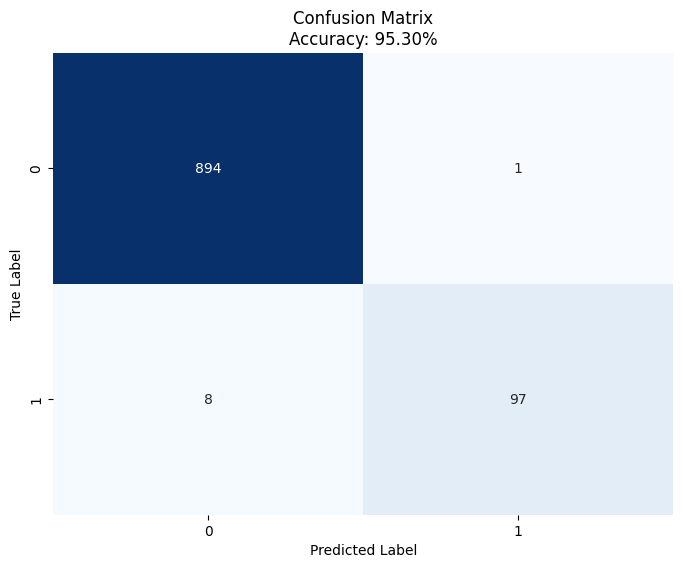

In [ ]:
# confusion matrix for the desicion tree model

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(f"Confusion Matrix\nAccuracy: {accuracy * 100:.2f}%")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Area Under the Curve

AUC: 1.00


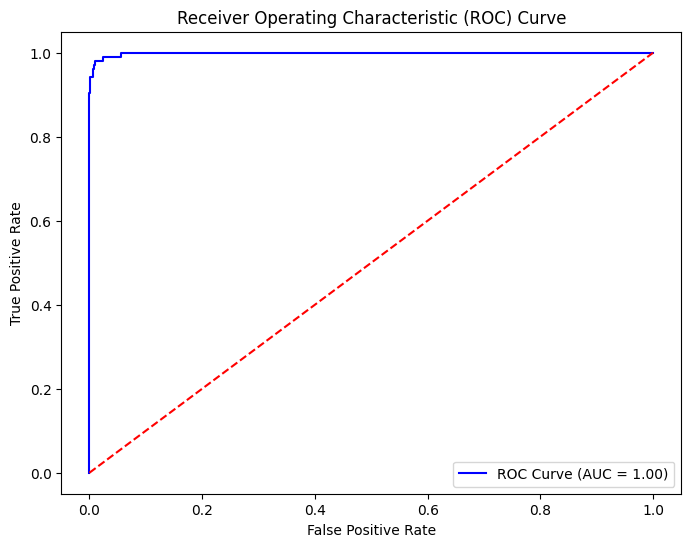

In [ ]:
# xgboost nmodel

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC: 0.45


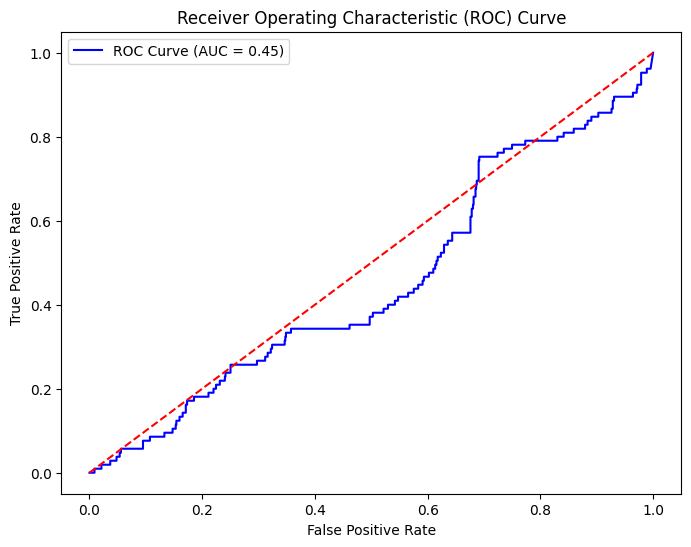

In [ ]:
# ANN model

# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=1, activation='sigmoid'))
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
y_pred_proba = ann_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


AUC: 1.00


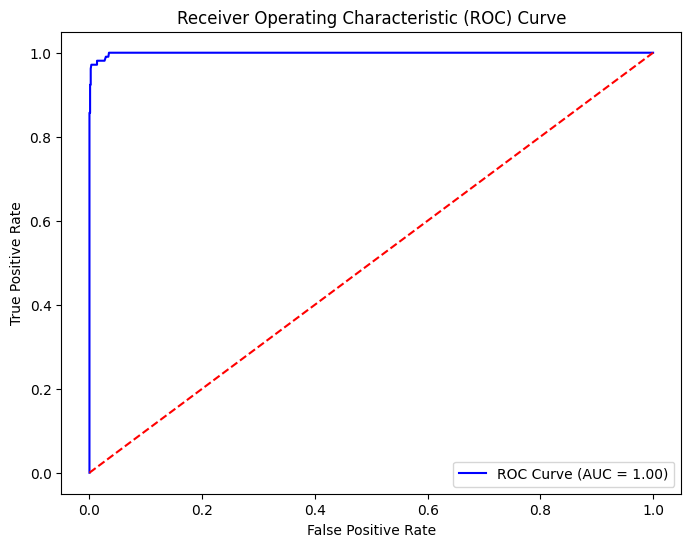

In [ ]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.97


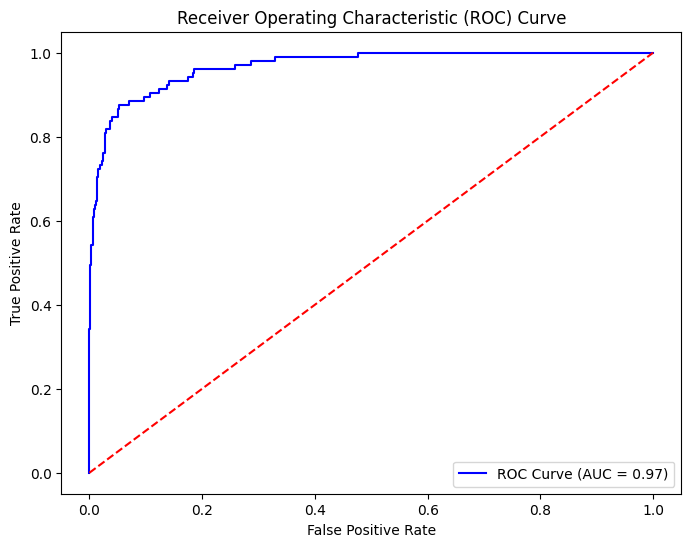

In [ ]:
#Logic regression

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC: 0.96


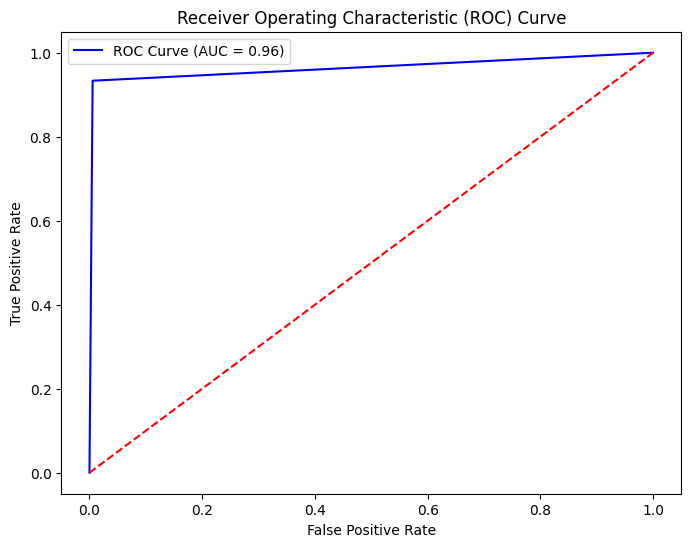

In [ ]:
# desicion tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()